In [1]:
import os
os.chdir('../../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', font_scale=2.0, style='whitegrid')

In [2]:
copernicus_reanalysis = pd.read_csv(
    'data/raw/H_ERA5_ECMW_T639_TA-_0002m_Euro_NUT0_S197901010000_E202212312300_INS_TIM_01d_NA-_noc_org_NA_NA---_NA---_NA---.csv',
    header=52,
    index_col=0,
    parse_dates=True,
    )

In [3]:
temperature_celsius_germany = (copernicus_reanalysis['DE'] - 273.15)

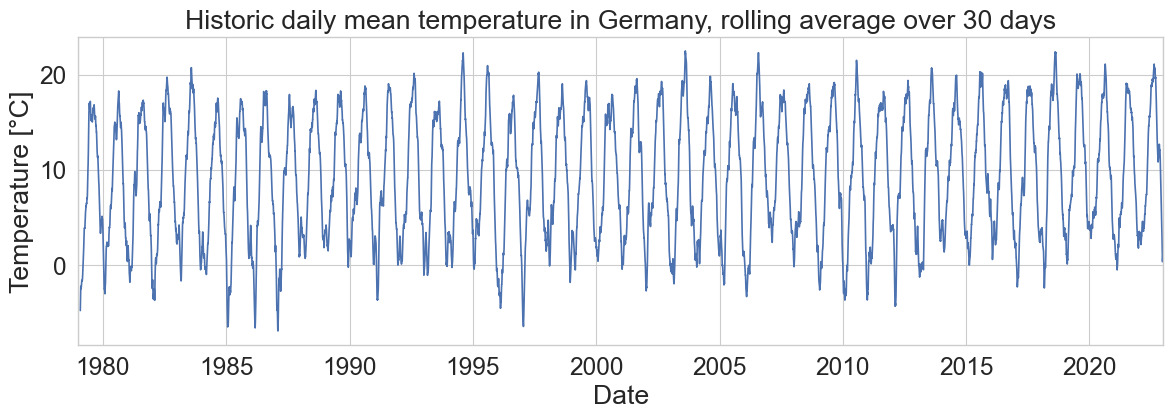

In [4]:
# Rolling average over 30 days
temperature_celsius_germany_rolling = temperature_celsius_germany.rolling(30).mean()

# Plot
fig, ax = plt.subplots(figsize=(14, 4))
temperature_celsius_germany_rolling.plot(ax=ax)

ax.set_title('Historic daily mean temperature in Germany, rolling average over 30 days')
ax.set_ylabel('Temperature [°C]')
ax.set_xlabel('Date')

# Save plot
fig.savefig("diagrams/data_overview_001_001.svg", format="svg", bbox_inches="tight")

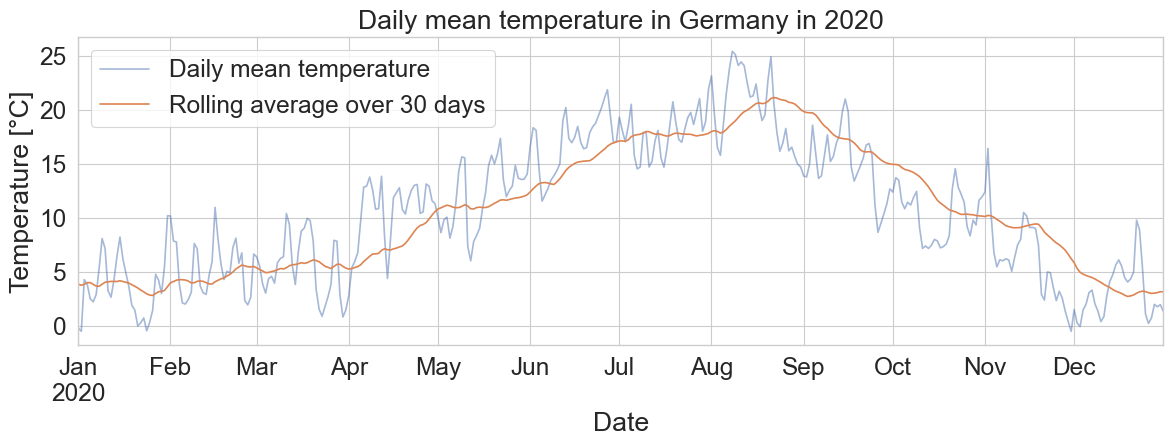

In [5]:
# Look at rolling average and daily values for 2020
fig, ax = plt.subplots(figsize=(14, 4))
temperature_celsius_germany['2020'].plot(ax=ax, alpha=0.5)
temperature_celsius_germany_rolling['2020'].plot(ax=ax)

ax.set_title('Daily mean temperature in Germany in 2020')
ax.set_ylabel('Temperature [°C]')
ax.set_xlabel('Date')
ax.legend(['Daily mean temperature', 'Rolling average over 30 days'])

# Save plot
fig.savefig("diagrams/data_overview_001_002.svg", format="svg", bbox_inches="tight")